# <center style='color:skyblue'> `Gaussian Mixture Model (GMM)` for clustering - calculate `AIC/BIC` </center>

## 1. Import required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.mixture import GaussianMixture
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

## 2. Load `penguins` dataset

In [2]:
penguins = pd.read_csv('penguins.csv')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
penguins.shape

(344, 7)

In [4]:
penguins.isnull().any()

species              False
island               False
bill_length_mm        True
bill_depth_mm         True
flipper_length_mm     True
body_mass_g           True
sex                   True
dtype: bool

In [5]:
penguins.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

## 3. Drop NaN values

In [6]:
df = penguins.dropna()
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [7]:
df.shape

(333, 7)

In [8]:
df.isnull().any()

species              False
island               False
bill_length_mm       False
bill_depth_mm        False
flipper_length_mm    False
body_mass_g          False
sex                  False
dtype: bool

In [9]:
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [10]:
np.unique(df.species)

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [11]:
np.unique(df.species, return_counts=True)

(array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object),
 array([146,  68, 119]))

## 4. Replace categorical variables with numeric values

In [12]:
df['species'].replace(['Adelie', 'Chinstrap', 'Gentoo'], [0, 1, 2], inplace=True)
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,0,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,0,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,0,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,0,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [13]:
np.unique(df.species)

array([0, 1, 2])

## 5. Select some features and the targets

In [14]:
features = df.drop(['species', 'island', 'sex'], axis=1)
targets = df['species']

## 6. Perform GMM for clustering

In [15]:
gmm = GaussianMixture(n_components=3, random_state=10)
gmm.fit(features)
preds = gmm.predict(features)

In [16]:
metrics.mutual_info_score(targets, preds)

0.9826579156619797

## 7. Comparison of predictions with targets

In [17]:
cm = metrics.confusion_matrix(targets, preds)

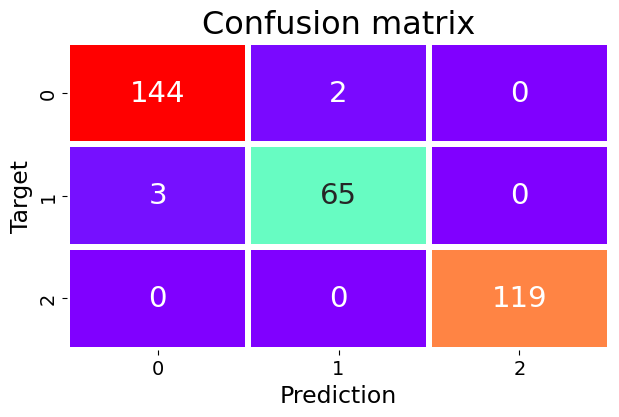

In [18]:
plt.figure(figsize=(7, 4))

sns.heatmap(cm, annot=True, fmt='d', linewidth=3, annot_kws={'size': 21}, cbar=False, cmap='rainbow')

plt.xlabel('Prediction', fontsize=17)
plt.ylabel('Target', fontsize=17)
plt.title('Confusion matrix', fontsize=23)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

## 8. Calculate `AIC (Akaike Information Criterion)` and `BIC (Bayesian Information Criterion)` to determine the best fit

In [19]:
N = [2, 3, 4, 5, 6, 7]

aic, bic = [], []

for x in N:
    GMM = GaussianMixture(n_components=x, random_state=10)
    GMM.fit(features)
    aic.append(round(GMM.aic(features)))
    bic.append(round(GMM.bic(features)))

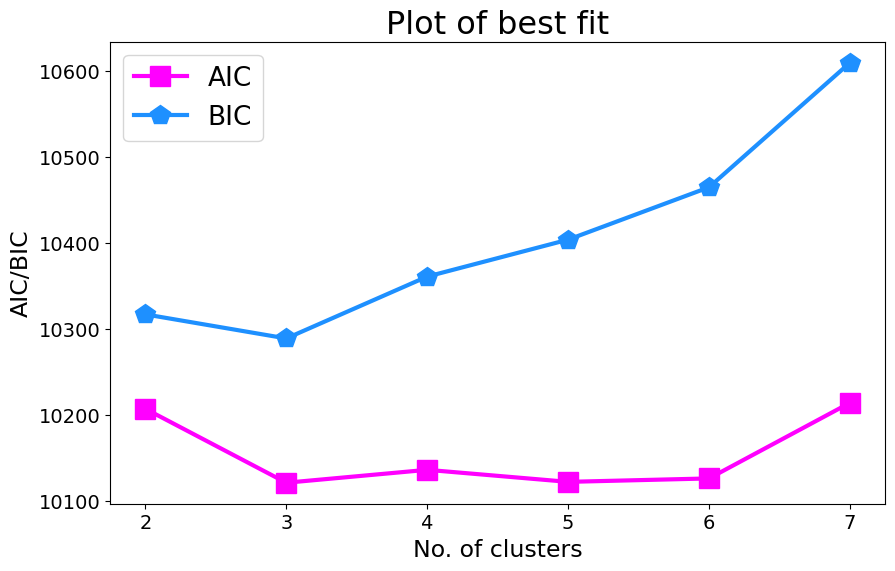

In [20]:
plt.figure(figsize=(10, 6))

plt.plot(N, aic, color='magenta', linewidth=3, marker='s', markersize=15, label='AIC')
plt.plot(N, bic, color='dodgerblue', linewidth=3, marker='p', markersize=15, label='BIC')

plt.xlabel('No. of clusters', fontsize=17)
plt.ylabel('AIC/BIC', fontsize=17)
plt.title('Plot of best fit', fontsize=23)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=19);

In [21]:
aic

[10207, 10121, 10136, 10122, 10126, 10214]

In [22]:
bic

[10317, 10289, 10361, 10404, 10465, 10610]

#### Lower values of AIC and BIC denote better fitting